# Bootstrap Sampling


In [1]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [0.6, 0.4, 0.5, 0.1]
OOB Sample: [0.2, 0.3]


0.664488017429194
0.6502145922746781
0.6888412017167382
0.6773504273504274
0.7023060796645703
0.6936170212765957
0.652267818574514
0.6776315789473685
0.646551724137931
0.710239651416122
0.638477801268499
0.7407407407407407
0.7184873949579832
0.7198275862068966
0.6792452830188679
0.6801705756929638
0.6652360515021459
0.6978723404255319
0.7032967032967034
0.7172995780590717
0.693304535637149
0.6866952789699571
0.6702586206896551
0.696969696969697
0.7012987012987013
0.6781857451403888
0.6602150537634408
0.697228144989339
0.6835164835164835
0.7042553191489361
0.6971677559912854
0.703862660944206
0.7063829787234043
0.684322033898305
0.7321814254859611
0.6962025316455697
0.7012987012987013
0.6566523605150214
0.6550218340611353
0.6617021276595745
0.6616379310344828
0.6924731182795699
0.6751592356687898
0.6893617021276596
0.6931330472103004
0.6831896551724138
0.6569037656903766
0.6815144766146993
0.655982905982906
0.6944444444444444
0.6927966101694916
0.6779661016949152
0.691304347826087
0.706

0.7446351931330472
0.7015250544662309
0.7039473684210527
0.6701680672268907
0.6772823779193206
0.6958424507658644
0.7282377919320594
0.683083511777302
0.6788008565310493
0.6570155902004454
0.7158351409978309
0.708779443254818
0.7019027484143763
0.684322033898305
0.6864406779661016
0.6751592356687898
0.7133620689655172
0.6810344827586207
0.6538461538461539
0.6956521739130435
0.6829787234042554
0.7106382978723405
0.7145877378435518
0.652452025586354
0.7106382978723405
0.6836283185840708
0.7077922077922078
0.6853002070393375
0.6919739696312365
0.6752136752136753
0.6530172413793104
0.7342047930283224
0.6821192052980133
0.6952789699570815
0.646551724137931
0.7067833698030634
0.6855895196506551
0.6752136752136753
0.6980306345733042
0.6376811594202898
0.7002141327623126
0.7192224622030238
0.7040816326530612
0.6828752642706131
0.6813417190775681
0.6788008565310493
0.6565874730021598
0.6896551724137931
0.6896551724137931
0.7043478260869566
0.7019438444924406
0.7151898734177216
0.702355460385439

0.6815286624203821
0.6801705756929638
0.6553191489361702
0.7062634989200864
0.7010752688172043
0.7164179104477612
0.6993464052287581
0.6936170212765957
0.6860215053763441
0.6751054852320675
0.702819956616052
0.6644591611479028
0.6826086956521739
0.6993464052287581
0.700218818380744
0.7
0.6939655172413793
0.6987179487179487
0.6936170212765957
0.6974248927038627
0.703862660944206
0.649890590809628
0.6688453159041394
0.7402597402597403
0.6716101694915254
0.7407407407407407
0.6616379310344828
0.70276008492569
0.6752688172043011
0.7008547008547008
0.6952789699570815
0.6723044397463002
0.6630901287553648
0.7124463519313304
0.6863157894736842
0.6573875802997858
0.6880530973451328
0.7315010570824524
0.659043659043659
0.6794871794871795
0.6738197424892703
0.6557017543859649
0.7167019027484144
0.7025862068965517
0.6823027718550106
0.6417910447761194
0.725531914893617
0.7151898734177216
0.703862660944206
0.6778242677824268
0.7195652173913043
0.7133891213389121
0.7149122807017544
0.702819956616052

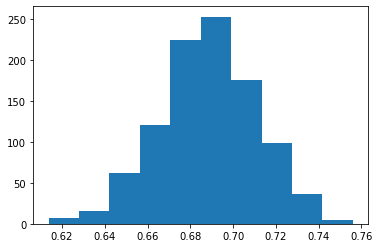

95.0 confidence interval 64.3% and 73.1%


In [4]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
data = read_csv('pima-indians-diabetes.data.csv', header=None)
values = data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)
	print(score)
	stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Example

In [5]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [6]:
np.set_printoptions(formatter={'float': lambda x: '%.3f' % x})

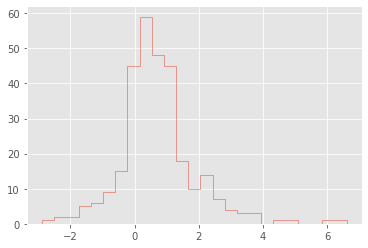

In [7]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [8]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.596, 0.860])

### Reprise of bootstrap example for Monte Carlo integration

In [9]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [10]:
# data sample for integration
n = 100
x = f(np.random.random(n))

In [11]:
# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

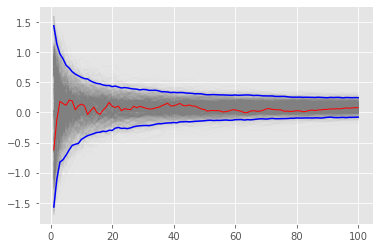

In [12]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

# Implement Bootstrap Sampling

In [13]:
import numpy as np
import seaborn as sns
import random

In [14]:
# normal distribution 
x = np.random.normal(loc= 500.0, scale=1.0, size=10000)

np.mean(x)

500.0110503651984

In [15]:
sample_mean = []

# Bootstrap Sampling
for i in range(40):
  y = random.sample(x.tolist(), 5)
  avg = np.mean(y)

  sample_mean.append(avg)

In [16]:
np.mean(sample_mean)

500.08980574107335

# Example 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [19]:
rainfall = np.array([   875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
                        686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
                        743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
                        701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
                        646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
                        828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
                        773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
                        809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
                        936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
                        985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
                        598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
                        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
                        802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
                        774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
                        940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
                        915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
                        667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
                        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
                        896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

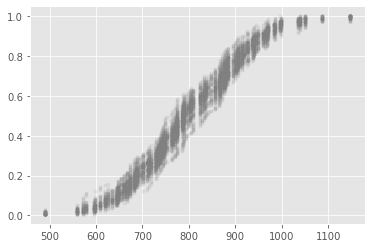

In [20]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

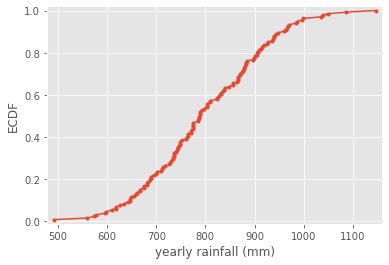

In [21]:
# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()